# Alternus vera project - Individual

   ## Student ID: 012482392                     Student Name: Hemambujam Veeraraghavan

   ### Credibility of the news source:

Credibility of a news source plays a huge role in accessing and analysing fake news. In the given dataset, the “context” column has been chosen to be the area of interest. This label hold data of the news source, which gives an insight to the exact origin of the news. The tracking down of the news source first point of news analysis and help narrow down the genuity of the news itself. 



#### Dataset Exploration

In [2]:
# read data into a dataframe
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
dfs_train = pd.read_excel("train.xlsx")

In [3]:
#observe a row
print("Number of Rows and Columns::", dfs_train.shape)
print(dfs_train.loc[0])

Number of Rows and Columns:: (10268, 15)
ID                                                              2635.json
label                                                               False
statement               Says the Annies List political group supports ...
subject(s)                                                       abortion
speaker                                                      dwayne-bohac
speaker's job title                                  State representative
Weight                                                                NaN
state info                                                          Texas
party affiliation                                              republican
barely true counts                                                      0
false counts                                                            1
half true counts                                                        0
mostly true counts                                                     

### Visualizations:

With the pre-processed dataset, we do visualizations to understand the dataset and the correlation between the columns against one another, better. This step plays a crucial role in getting the nuances of the data present with relation to another. 

In [4]:
#Pre-Processing for "context" - the source of the news
X_train=dfs_train["context"]
Y_train=dfs_train["label"]

#### Cross Tabulation

In [6]:
ct=pd.crosstab(X_train,Y_train,margins=True)
ct

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
CNN's 'The Situation Room',1,0,0,0,0,0,1
CNN's State of the Union with John King,0,0,0,0,1,0,1
This Week with George Stephanopoulos,0,0,0,1,0,0,1
Washington Report newsletter to constituents,1,0,0,0,0,0,1
a Webcast,1,0,0,0,0,0,1
a White House news conference,0,0,0,1,0,0,1
"a meeting with business leaders in Portsmouth, NH",1,0,0,0,0,0,1
a news release,2,0,0,0,0,0,2
a speech,0,0,0,0,0,1,1


In [7]:
#Sorted to the highest to lowest
ct.sort_values('All', ascending=False)

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
All,1974,1662,1642,2106,1947,831,10162
a news release,50,50,51,52,50,24,277
a speech,50,56,38,60,57,12,273
a press release,46,63,42,57,50,15,273
an interview,69,39,36,53,55,14,266
a TV ad,35,24,47,55,42,17,220
a tweet,30,31,27,25,41,18,172
a radio interview,36,21,23,27,20,11,138
a campaign ad,19,11,48,31,16,7,132


#### Inference:

Thus we observe the context separation according to label. We see there are total 10263 rows and 3837 cumulative subjects which can be further separated and processed on.

We observe that the most frequent news sources include new release, speech, and press release. 

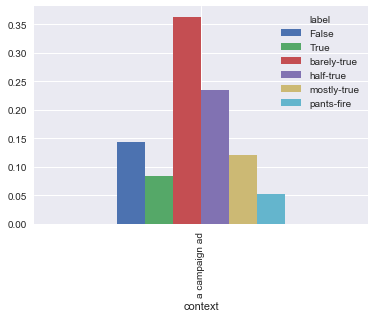

In [8]:
ct_normalized=pd.crosstab(X_train,Y_train,normalize='index', margins=True)
ct_normalized.loc[ct_normalized.index.get_level_values('context') == "a campaign ad"].plot(kind='bar')

#### Exploration

The chart above indicates that approximately 45% of the news from "a Campaign ad" falls under the True category, 40% are false.


#### Lables in the dataset

Eploring the entire datset based on the labels for the context field give a better understaning of the entire dataset and the percentage of fake and real news present in it.

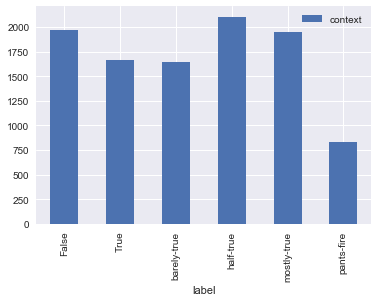

In [9]:
dfTwoCols= dfs_train[['label','context']]
dfTwoCols.groupby("label").count().plot(kind='bar')

#### Verdict:

For a better classification we now combine

1. False, barely-true, pants-fire as lie --> 0
2. half-true, mostly-true and True as truth --> 1

And store the values in a separate column and call it "verdict"

In [10]:
dfTwoCols['verdict'] = dfTwoCols['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

C:\Users\Hema\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label,context,verdict
0,False,a mailer,0
1,half-true,a floor speech,1
2,mostly-true,Denver,1
3,False,a news release,0
4,half-true,an interview on CNN,1
5,True,a an online opinion-piece,1
6,barely-true,a press release,0
7,half-true,"a Democratic debate in Philadelphia, Pa",1
8,half-true,a website,1
9,mostly-true,an online video,1


#### Plot of the Verdict:

The below graph weighs the odds of a verdict being false against a label. This gives a different, fresher  prospective of the dataset

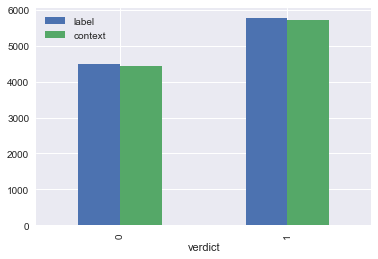

In [11]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

Based on the verdict, we understand that the dataset is trustworthy and has higher truth values when compared to false information. 

In [12]:
ct1=pd.crosstab(dfTwoCols["context"],dfTwoCols["verdict"],margins=True)
ct1.sort_values('All', ascending=False)

verdict,0,1,All
context,,,
All,4447,5715,10162
a news release,125,152,277
a speech,100,173,273
a press release,103,170,273
an interview,119,147,266
a TV ad,99,121,220
a tweet,75,97,172
a radio interview,70,68,138
a campaign ad,74,58,132


#### Inference 

The news source in case of blog post and chain emails have higher fake news values comepared to news release and speech made to a campaign. These points, along with the above created visualization tells us that the source of the news and its credibility  will have extremely polarised graphs.

## Natural Language Processing
### Data Preprocessing:

The dataset contains approximately 10000 rows in the data set with 14 columns to them. We have removed the characters in order to enhance the runtime of the code and not having to deal with Not a Number (NaN) kind of errors

In [13]:
# Training dataset
dfs_train

,ID,label,statement,subject(s),speaker,speaker's job title,Weight,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,NaN,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,NaN,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,NaN,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,NaN,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,NaN,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa"
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,NaN,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\Hema\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package wordnet to C:\Users\Hema
[nltk_data]     Raghavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Lemmatisation:
Words in third person are changed to first person and verbs in past and future tenses are changed into present.

In [15]:
# lemmatizer
print(WordNetLemmatizer().lemmatize('was', pos='v'))

be


#### Stemming 
Words are reduced to their root form.

In [16]:
# stemmer

stemmer = SnowballStemmer('english')
original_words = ['interviews', 'debates', 'conferences', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,interviews,interview
1,debates,debat
2,conferences,confer
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [17]:
# Python libraries and funtions for lemetizing and stemming
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    try:
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
    except:
        pass
        
    return result

In [18]:
# testing 

doc_sample = dfs_train[dfs_train['ID'] == '2635.json']["context"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['a', 'mailer']


 tokenized and lemmatized document: 
['mailer']


In [19]:
# on successful execution on the sample test, processing for all documents
processed_docs = dfs_train['context'].map(preprocess)
processed_docs[:10]

0                           [mailer]
1                    [floor, speech]
2                           [denver]
3                     [news, releas]
4                        [interview]
5             [onlin, opinion, piec]
6                    [press, releas]
7    [democrat, debat, philadelphia]
8                           [websit]
9                     [onlin, video]
Name: context, dtype: object

In [20]:
# create the dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 mailer
1 floor
2 speech
3 denver
4 news
5 releas
6 interview
7 onlin
8 opinion
9 piec
10 press


In [21]:
# remove all words that appear too many or too few times and restrict to 100000 words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(200 unique tokens: ['mailer', 'floor', 'speech', 'denver', 'news']...)


In [22]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]


(2, 1)

In [23]:
# corpus and frequency count for each document
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

10268


### Naive baysian classifier


In [24]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [25]:
#print(bow_corpus)
class_train=np.array(dfTwoCols["verdict"])
print(class_train)
class_train=class_train.reshape(-1,1)
print(class_train)

pipeline.fit(dfs_train['statement'],class_train)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


C:\Users\Hema\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function preprocess at 0x00000217530D0268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [26]:
# test change and assign classification on dataset
dfs_test = pd.read_excel("test.xlsx")
msg_test=dfs_test["context"]
dfTwoCols_test= dfs_test[['label','context']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
predictions = pipeline.predict(msg_test)

[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


C:\Users\Hema\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
print(classification_report(class_test,predictions))

             precision    recall  f1-score   support

          0       0.44      0.53      0.48       556
          1       0.57      0.47      0.52       727

avg / total       0.51      0.50      0.50      1283



#### NB inference:

Based on the dataset, the above gives the precision, recall for the context. The average precision is about 51%

## Heat Map Confusion Matrix

A heat map can be plotted on the basis of the outcome form the Naïve Bayesian classifier which is found below

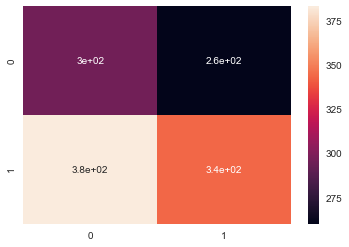

In [28]:

sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

## Sentiment Analysis Using Data Enrichment
Ref: https://blog.lftechnology.com/predicting-sentiment-on-news-data-45c5c22ec2e3

Sentiment analysis has been performed by inducing a new dataset into the model. This dataset has a common fiel called "source" which can be infered as "context" in our exising dataset This is the enrichment we have acheiived for this step

In [29]:
# Data enrichment
data_source = pd.read_excel('uci-news-aggregator.xlsx')


In [30]:
data_source

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1394470372615
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1394470372792
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1394470501265


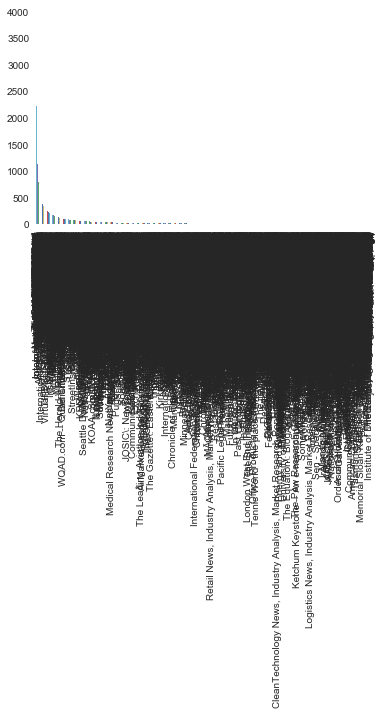

In [31]:
# The publisher is the news source in this dataset 
data_source['PUBLISHER'].value_counts().plot(kind="bar")
plt.show()

# train/test data split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_sentiment, test_size=0.2)

### Sentiment analysis

We have used the “Vader lexicon” from the ntlk library for our analysis. This lexicon library returns a 
sentiment score in the range of -1 to +1, and as they imply it ranges from negative to positive. This library gives a cumulative score on each sentence based on the sentiment score of each of the Vader listed words comprising the sentence.  


 The ntlk_sentiment function makes use of the nltk.sentiment.sentiment_analyzer module to access the sentiment score of each word comprising the sentence. Thus, for each of the sentences we have a list of values showing negative, neutral and positive scores. We have also reclassified the scores in a way to get a better understanding of the dataset.  


In [32]:
# Using vader lexicon to determine sentiment
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Hema
[nltk_data]     Raghavan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [44]:
for row in dfs_train["context"]:
    try:
        nltk_context = nltk_sentiment(row) 
    except:
        pass
    
print (nltk_context)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [45]:
nltk_results = [nltk_sentiment(row) for row in dfs_train["statement"]]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(dfs_train, columns = ['statement'])
nltk_df = text_df.join(results_df)
verdict_df=pd.DataFrame(dfTwoCols, columns=['verdict'])
nltk_df=nltk_df.join(verdict_df)

In [46]:
nltk_df

,statement,compound,neg,neu,pos,verdict
0,Says the Annies List political group supports ...,0.2500,0.115,0.692,0.192,0
1,When did the decline of coal start? It started...,0.3612,0.000,0.902,0.098,1
2,"Hillary Clinton agrees with John McCain ""by vo...",0.3182,0.107,0.687,0.206,1
3,Health care reform legislation is likely to ma...,0.7579,0.000,0.606,0.394,0
4,The economic turnaround started at the end of ...,0.0000,0.000,1.000,0.000,1
5,The Chicago Bears have had more starting quart...,-0.5106,0.120,0.836,0.043,1
6,Jim Dunnam has not lived in the district he re...,0.0000,0.000,1.000,0.000,0
7,I'm the only person on this stage who has work...,0.2500,0.045,0.874,0.080,1
8,"However, it took $19.5 million in Oregon Lotte...",0.0000,0.000,1.000,0.000,1
9,Says GOP primary opponents Glenn Grothman and ...,0.0000,0.000,1.000,0.000,1


In [47]:
# recassify results to get better understanding
nltk_df.loc[nltk_df['compound'] > 0.2, 'compound'] = 1
nltk_df.loc[nltk_df['compound'] < -0.2, 'compound'] = -1
nltk_df.loc[(nltk_df['compound'] > -0.2) & (nltk_df['compound'] < 0.2), 'compound'] = 0
nltk_df


,statement,compound,neg,neu,pos,verdict
0,Says the Annies List political group supports ...,1.0,0.115,0.692,0.192,0
1,When did the decline of coal start? It started...,1.0,0.000,0.902,0.098,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1.0,0.107,0.687,0.206,1
3,Health care reform legislation is likely to ma...,1.0,0.000,0.606,0.394,0
4,The economic turnaround started at the end of ...,0.0,0.000,1.000,0.000,1
5,The Chicago Bears have had more starting quart...,-1.0,0.120,0.836,0.043,1
6,Jim Dunnam has not lived in the district he re...,0.0,0.000,1.000,0.000,0
7,I'm the only person on this stage who has work...,1.0,0.045,0.874,0.080,1
8,"However, it took $19.5 million in Oregon Lotte...",0.0,0.000,1.000,0.000,1
9,Says GOP primary opponents Glenn Grothman and ...,0.0,0.000,1.000,0.000,1


In [36]:
nltk_df_f=nltk_df[["statement","compound","verdict"]]

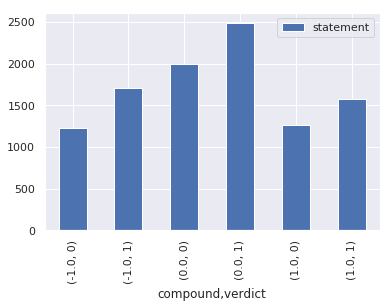

In [37]:
nltk_df_f.groupby(["compound","verdict"]).count().plot(kind='bar')

#### Inference:

The effect of negative, neutral and positive context on true and false news can be understood

## LDA

TF-IDF is an algorithm it has 2 subparts:
  1. Terms frequency 
  2. Inverse data frequency. 

TF gives us the frequency of the word in each document while IDF give us the weight of all rare words present in the document. 
In LDA we divide the document on the basic of topics and classify words as per topic. Here we are checking the frequency of each word and comparing it with normal LDA model.


In [48]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [49]:
corpus_tfidf = tfidf[bow_corpus]

In [50]:

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [51]:
#lda bag of words 
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [52]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.253*"campaign" + 0.176*"interview" + 0.092*"radio" + 0.051*"mailer" + 0.051*"commerci" + 0.018*"address" + 0.017*"state" + 0.015*"televis" + 0.012*"news" + 0.012*"releas"
Topic: 1 
Words: 0.120*"statement" + 0.084*"email" + 0.069*"websit" + 0.064*"campaign" + 0.057*"post" + 0.043*"chain" + 0.040*"blog" + 0.036*"advertis" + 0.028*"mail" + 0.023*"site"
Topic: 2 
Words: 0.429*"interview" + 0.062*"week" + 0.057*"msnbc" + 0.045*"news" + 0.033*"report" + 0.027*"broadcast" + 0.025*"comment" + 0.023*"mail" + 0.018*"morn" + 0.017*"iowa"
Topic: 3 
Words: 0.136*"state" + 0.099*"video" + 0.080*"post" + 0.059*"union" + 0.055*"websit" + 0.042*"onlin" + 0.040*"letter" + 0.035*"address" + 0.032*"internet" + 0.031*"fundrais"
Topic: 4 
Words: 0.257*"debat" + 0.105*"presidenti" + 0.071*"republican" + 0.060*"column" + 0.038*"town" + 0.037*"post" + 0.037*"hall" + 0.031*"twitter" + 0.020*"meet" + 0.020*"democrat"
Topic: 5 
Words: 0.283*"speech" + 0.084*"floor" + 0.076*"hous" + 0.060*"sena

From the above result we can distinguish different topics using words in each topic and there corresponding weights


Let us  TF-IDF for running LDA

In [53]:
#lda tf-idf 
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [54]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.252*"campaign" + 0.080*"floor" + 0.079*"commerci" + 0.054*"senat" + 0.052*"speech" + 0.037*"televis" + 0.035*"hous" + 0.023*"video" + 0.023*"tampa" + 0.019*"websit"
Topic: 1 Word: 0.077*"campaign" + 0.074*"post" + 0.044*"republican" + 0.043*"meet" + 0.042*"appear" + 0.041*"twitter" + 0.040*"iowa" + 0.039*"blog" + 0.038*"debat" + 0.030*"onlin"
Topic: 2 Word: 0.266*"interview" + 0.151*"releas" + 0.121*"news" + 0.102*"radio" + 0.082*"press" + 0.033*"newspap" + 0.023*"mail" + 0.015*"articl" + 0.014*"debat" + 0.014*"confer"
Topic: 3 Word: 0.098*"statement" + 0.092*"campaign" + 0.071*"mailer" + 0.067*"websit" + 0.049*"letter" + 0.044*"presidenti" + 0.032*"debat" + 0.032*"washington" + 0.023*"voter" + 0.020*"articl"
Topic: 4 Word: 0.081*"state" + 0.064*"column" + 0.063*"video" + 0.048*"union" + 0.032*"blast" + 0.030*"email" + 0.029*"address" + 0.025*"hous" + 0.025*"fundrais" + 0.024*"forum"
Topic: 5 Word: 0.210*"televis" + 0.163*"tweet" + 0.060*"report" + 0.048*"websit" + 0.0

In [55]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.253*"campaign" + 0.176*"interview" + 0.092*"radio" + 0.051*"mailer" + 0.051*"commerci" + 0.018*"address" + 0.017*"state" + 0.015*"televis" + 0.012*"news" + 0.012*"releas"

Score: 0.10000000149011612	 
Topic: 0.120*"statement" + 0.084*"email" + 0.069*"websit" + 0.064*"campaign" + 0.057*"post" + 0.043*"chain" + 0.040*"blog" + 0.036*"advertis" + 0.028*"mail" + 0.023*"site"

Score: 0.10000000149011612	 
Topic: 0.429*"interview" + 0.062*"week" + 0.057*"msnbc" + 0.045*"news" + 0.033*"report" + 0.027*"broadcast" + 0.025*"comment" + 0.023*"mail" + 0.018*"morn" + 0.017*"iowa"

Score: 0.10000000149011612	 
Topic: 0.136*"state" + 0.099*"video" + 0.080*"post" + 0.059*"union" + 0.055*"websit" + 0.042*"onlin" + 0.040*"letter" + 0.035*"address" + 0.032*"internet" + 0.031*"fundrais"

Score: 0.10000000149011612	 
Topic: 0.257*"debat" + 0.105*"presidenti" + 0.071*"republican" + 0.060*"column" + 0.038*"town" + 0.037*"post" + 0.037*"hall" + 0.031*"twitter" + 0.020*"m

In [56]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.252*"campaign" + 0.080*"floor" + 0.079*"commerci" + 0.054*"senat" + 0.052*"speech" + 0.037*"televis" + 0.035*"hous" + 0.023*"video" + 0.023*"tampa" + 0.019*"websit"

Score: 0.10000000149011612	 
Topic: 0.077*"campaign" + 0.074*"post" + 0.044*"republican" + 0.043*"meet" + 0.042*"appear" + 0.041*"twitter" + 0.040*"iowa" + 0.039*"blog" + 0.038*"debat" + 0.030*"onlin"

Score: 0.10000000149011612	 
Topic: 0.266*"interview" + 0.151*"releas" + 0.121*"news" + 0.102*"radio" + 0.082*"press" + 0.033*"newspap" + 0.023*"mail" + 0.015*"articl" + 0.014*"debat" + 0.014*"confer"

Score: 0.10000000149011612	 
Topic: 0.098*"statement" + 0.092*"campaign" + 0.071*"mailer" + 0.067*"websit" + 0.049*"letter" + 0.044*"presidenti" + 0.032*"debat" + 0.032*"washington" + 0.023*"voter" + 0.020*"articl"

Score: 0.10000000149011612	 
Topic: 0.081*"state" + 0.064*"column" + 0.063*"video" + 0.048*"union" + 0.032*"blast" + 0.030*"email" + 0.029*"address" + 0.025*"hous" + 0.025*"fu

### Inference:

From the above result we can evaluate result by classifying sample documents using LDA bag of words model.


In [67]:
unseen_document = 'campaign interview on radio'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7749848961830139	 Topic: 0.253*"campaign" + 0.176*"interview" + 0.092*"radio" + 0.051*"mailer" + 0.051*"commerci"
Score: 0.02500712312757969	 Topic: 0.429*"interview" + 0.062*"week" + 0.057*"msnbc" + 0.045*"news" + 0.033*"report"
Score: 0.02500241994857788	 Topic: 0.138*"speech" + 0.084*"tweet" + 0.077*"convent" + 0.068*"radio" + 0.057*"nation"
Score: 0.025001903995871544	 Topic: 0.117*"interview" + 0.085*"newspap" + 0.077*"articl" + 0.062*"news" + 0.037*"week"
Score: 0.02500143088400364	 Topic: 0.231*"news" + 0.111*"releas" + 0.105*"televis" + 0.074*"interview" + 0.069*"confer"
Score: 0.02500097081065178	 Topic: 0.120*"statement" + 0.084*"email" + 0.069*"websit" + 0.064*"campaign" + 0.057*"post"
Score: 0.025000547990202904	 Topic: 0.218*"press" + 0.134*"releas" + 0.091*"meet" + 0.062*"post" + 0.054*"facebook"
Score: 0.02500035986304283	 Topic: 0.283*"speech" + 0.084*"floor" + 0.076*"hous" + 0.060*"senat" + 0.039*"remark"
Score: 0.025000257417559624	 Topic: 0.136*"state" + 0.0


### LDA2Vec

Ref: https://dl.acm.org/citation.cfm?id=1451991

So we can see that this document is 77% related to this topic with the following important words
year,percent,vote,say etc

## Sensationalism quantification
### Based on Punctuation, Length, Similarity to Source dictionary

Based on the dictionary we have generated, we try and quntify the credibility of the news source based on its punctuations, lenth, similarity to the source in the dataset

In [68]:
dfs_train_sensa= dfs_train
dfs_train_sensa['verdict']=dfTwoCols['verdict']
dfs_train_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,Weight,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,verdict
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,NaN,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,NaN,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,NaN,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,NaN,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,1
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release,0
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,NaN,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa",1
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,1
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,NaN,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,1


In [69]:
#profanity list
PROFANITY=['anus', 'arse', 'arsehole', 'ass', 'ass-hat', 'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbanger', 'assbite', 'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfuck', 'assfucker', 'assgoblin', 'asshat', 'asshead', 'asshole', 'asshopper', 'assjacker', 'asslick', 'asslicker', 'assmonkey', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole', 'asssucker', 'asswad', 'asswipe', 'balls', 'bampot', 'bastard', 'beaner', 'bint', 'bitch', 'bitchass', 'bitches', 'bitchtits', 'bitchy', 'bloody', 'blowjob', 'blowjob', 'bollocks', 'bollox', 'boner', 'brotherfucker', 'bugger', 'bullshit', 'bumblefuck', 'butt plug', 'butt-pirate', 'buttfucka', 'buttfucker', 'camel toe', 'carpetmuncher', 'chinc', 'chink', 'choad', 'chode', 'clit', 'clitface', 'clitfuck', 'clusterfuck', 'cock', 'cockass', 'cockbite', 'cockburger', 'cockface', 'cockfucker', 'cockhead', 'cockjockey', 'cockknoker', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmuncher', 'cocknose', 'cocknugget', 'cockshit', 'cocksmith', 'cocksmoke', 'cocksmoker', 'cocksniffer', 'cocksucker', 'cockwaffle', 'coochie', 'coochy', 'coon', 'cooter', 'cracker', 'cum', 'cumbubble', 'cumdumpster', 'cumguzzler', 'cumjockey', 'cumslut', 'cumtart', 'cunnie', 'cunnilingus', 'cunt', 'cuntass', 'cuntface', 'cunthole', 'cuntlicker', 'cuntrag', 'cuntslut', 'dago', 'damn', 'deggo', 'dick', 'dickbag', 'dickbeaters', 'dickface', 'dickfuck', 'dickfucker', 'dickhead', 'dickhole', 'dickjuice', 'dickmilk', 'dickmonger', 'dicks', 'dickslap', 'dicksucker', 'dicksucking', 'dickwad', 'dickweasel', 'dickweed', 'dickwod', 'dike', 'dildo', 'dipshit', 'doochbag', 'dookie', 'douche', 'douche-fag', 'douchebag', 'douchewaffle', 'dumass', 'dumb ass', 'dumbass', 'dumbfuck', 'dumbshit', 'dumshit', 'dyke', 'fag', 'fagbag', 'fagfucker', 'faggit', 'faggot', 'faggotcock', 'fagtard', 'fatass', 'fellatio', 'feltch', 'flamer', 'fool', 'frickin', 'friggin', 'f*ck', 'fuck', 'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain', 'fuckbutt', 'fucked', 'fucker', 'fuckersucker', 'fuckface', 'fuckhead', 'fuckhole', 'fuckin', 'fucking', 'fucknut', 'fucknutt', 'fuckoff', 'fucks', 'fuckstick', 'fucktard', 'fucktart', 'fuckup', 'fuckwad', 'fuckwit', 'fuckwitt', 'fudgepacker', 'gay', 'gayass', 'gaybob', 'gaydo', 'gayfuck', 'gayfuckist', 'gaylord', 'gaytard', 'gaywad', 'goddamn', 'goddamnit', 'gooch', 'gook', 'gringo', 'guido', 'handjob', 'hard on', 'heeb', 'helminth', 'hell', 'ho', 'hoe', 'hoebag', 'homo', 'homodumbshit', 'honkey', 'humping', 'idiot', 'imbecile', 'jackass', 'jap', 'jerk off', 'jerk wad', 'jigaboo', 'jizz', 'jungle bunny', 'junglebunny', 'kike', 'kooch', 'kootch', 'kraut', 'kunt', 'kyke', 'lameass', 'lesbian', 'lesbo', 'lezzie', 'mcfagget', 'mick', 'midget', 'minge', 'moron', 'mothafucka', 'mothafuckin', 'motherfucker', 'motherfucking', 'muff', 'muffdiver', 'munging', 'negro', 'nigaboo', 'nigga', 'nigger', 'niggers', 'niglet', 'nutter', 'nut sack', 'nutsack', 'paki', 'panooch', 'pecker', 'peckerhead', 'penis', 'penisbanger', 'penisfucker', 'penispuffer', 'piss', 'pissed', 'pissed off', 'pissflaps', 'polesmoker', 'pollock', 'poon', 'poonani', 'poonany', 'poontang', 'porch monkey', 'porchmonkey', 'prick', 'punanny', 'punta', 'pussies', 'pussy', 'pussylicking', 'puto', 'queef', 'queer', 'queerbait', 'queerhole', 'renob', 'retard', 'rimjob', 'ruski', 'sand nigger', 'sandnigger', 'schlong', 'schmuck', 'scrote', 'scullion', 'shag', 'shit', 'shitass', 'shitbag', 'shitbagger', 'shitbrains', 'shitbreath', 'shitcanned', 'shitcunt', 'shitdick', 'shitface', 'shitfaced', 'shithead', 'shithole', 'shithouse', 'shitspitter', 'shitstain', 'shitter', 'shittiest', 'shitting', 'shitty', 'shiz', 'shiznit', 'skank', 'skeet', 'skullfuck', 'slag', 'slapper', 'slut', 'slutbag', 'slubberdegullion', 'smeg', 'snatch', 'sodding', 'sonofabitch', 'spastic', 'spic', 'spick', 'splooge', 'spook', 'suckass', 'tard', 'testicle', 'thundercunt', 'tit', 'titfuck', 'tits', 'tittyfuck', 'trollop', 'twat', 'twatlips', 'twats', 'twatwaffle', 'unclefucker', 'va-j-j', 'vag', 'vagina', 'vajayjay', 'vjayjay', 'wank', 'wanker', 'wankjob', 'wetback', 'whore', 'whorebag', 'whoreface', 'wop']

In [70]:
sensationalist_phrases = [

	# From Analyst's Desktop Binder of Homeland Security https://www.scribd.com/doc/82701103/Analyst-Desktop-Binder-REDACTED
	
	'Assassination',
	'Attack',
	'Domestic security',
	'Law enforcement',
	'Disaster',
	'National preparedness',
	'Response',
	'Recovery',
	'Emergency response',
	'First responder',
	'Militia',
	'Shooting',
	'Evacuation',
	'Hostage',
	'Explosion',
	'Organized crime',
	'Gangs',
	'National security',
	'State of emergency',
	'Security breach',
	'Threat',
	'Standoff',
	'Lockdown',
	'Bomb',
	'Riot',
	'Emergency Landing',
	'Incident',
	'Suspicious',
	'Nuclear threat',
	'Hazardous',
	'Infection',
	'Outbreak',
	'Contamination',
	'Terror',
	'Epidemic',
	'Critical Infrastructure',
	'National infrastructure',
	'Transportation security',
	'Grid',
	'Outage',
	'Disruption',
	'Violence',
	'Drug cartel',
	'Narcotics',
	'Shootout',
	'Trafficking',
	'Kidnap',
	'Illegal',
	'Smuggling', 
	'Al Qaeda',
	'Terror attack',
	'Weapon',
	'Improvised explosive device',
	'Suicide bomber',
	'Suicide attack',
	'Hurricane',
	'Tornado',
	'Tsunami',
	'Earthquake',
	'Tremor',
	'Flood',
	'Storm',
	'Extreme weather',
	'Forest fire',
	'Ice',
	'Stranded',
	'Wildfire',
	'Avalanche',
	'Blizzard',
	'Lightening',
	'Emergency Broadcast System',
	'Cyber Security',
	'DDOS',
	'Denial of service',
	'Malware',
	'Phishing',
	'Cyber attack',
	'Cyber terror'
]

In [71]:
def sensphrasedetect(str):
    sum =0
    for x in sensationalist_phrases:
        if x.lower() in str.lower():
            sum+=1
    return sum

In [83]:
## extract punctuation, capital letters, digits, length
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
#s = 'abcd!!?)().'

#print(count(s,set(string.punctuation))                                                                                                      )
#print("Capital Letters: ", sum(1 for c in "ahbcdsSJDH" if c.isupper()))
#print("Capital Letters: ", sum(1 for c in "ahbcdsSJDs2H" if c.isdigit()))
pcCount=[]
capCount=[]
digCount=[]
lenCount=[]
profanCount=[]
sensphrCount=[]
for x in dfs_train_sensa['context']:
    try:
        pcCount.append(sum(1 for c in x if c=="!" or c=="?"))
        capCount.append(sum(1 for c in x if c.isupper()))
        digCount.append(sum(1 for c in x if c.isdigit()))
        lenCount.append(len(x))
        sensphrCount.append(sensphrasedetect(x))
    except:
        pass
for x in processed_docs:
    try:
        profanCount.append(float(len([w for w in x if w.lower() in PROFANITY]))/len(x))
    except:
        profanCount.append(0)
dfs_train_sensa['puncCount']=pd.Series(pcCount)
dfs_train_sensa['capCount']=pd.Series(capCount)
dfs_train_sensa['digCount']=pd.Series(digCount)
dfs_train_sensa['lenCount']=pd.Series(lenCount)
dfs_train_sensa['profanCount']=pd.Series(profanCount)
dfs_train_sensa['sensPhrCount']=pd.Series(sensphrCount)
dfs_train_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,Weight,state info,party affiliation,barely true counts,...,mostly true counts,pants on fire counts,context,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,NaN,Texas,republican,0.0,...,0.0,0.0,a mailer,0,0.0,0.0,0.0,8.0,0.0,0.0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,NaN,Virginia,democrat,0.0,...,1.0,0.0,a floor speech,1,0.0,0.0,0.0,14.0,0.0,0.0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,NaN,Illinois,democrat,70.0,...,163.0,9.0,Denver,1,0.0,1.0,0.0,6.0,0.0,0.0
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,NaN,none,7.0,...,5.0,44.0,a news release,0,0.0,0.0,0.0,14.0,0.0,0.0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,NaN,Florida,democrat,15.0,...,19.0,2.0,an interview on CNN,1,0.0,3.0,0.0,19.0,0.0,0.0
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,NaN,Wisconsin,republican,0.0,...,5.0,1.0,a an online opinion-piece,1,0.0,0.0,0.0,25.0,0.0,0.0
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,NaN,Texas,republican,3.0,...,3.0,1.0,a press release,0,0.0,0.0,0.0,15.0,0.0,0.0
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,NaN,Illinois,democrat,70.0,...,163.0,9.0,"a Democratic debate in Philadelphia, Pa",1,0.0,3.0,0.0,39.0,0.0,0.0
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,NaN,organization,0.0,...,0.0,1.0,a website,1,0.0,0.0,0.0,10.0,0.0,0.0
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,NaN,Wisconsin,republican,0.0,...,1.0,0.0,an online video,1,0.0,0.0,0.0,15.0,0.0,0.0


In [84]:
#print values
dfs_train_sensa_true=dfs_train_sensa[dfs_train_sensa['verdict']==1]
dfs_train_sensa_false=dfs_train_sensa[dfs_train_sensa['verdict']==0]
print("true: "+str(dfs_train_sensa_true.shape[0]))
print("avg punc: "+str(dfs_train_sensa_true["puncCount"].mean()))
print("avg cap: "+str(dfs_train_sensa_true["capCount"].mean()))
print("avg dig: "+str(dfs_train_sensa_true["digCount"].mean()))
print("avg len: "+str(dfs_train_sensa_true["lenCount"].mean()))
print("avg profan: "+str(dfs_train_sensa_true["profanCount"].mean()))
print("avg sensation phr: "+str(dfs_train_sensa_true["sensPhrCount"].mean()))
print("false: "+str(dfs_train_sensa_false.shape[0]))
print("avg punc: "+str(dfs_train_sensa_false["puncCount"].mean()))
print("avg cap: "+str(dfs_train_sensa_false["capCount"].mean()))
print("avg dig: "+str(dfs_train_sensa_false["digCount"].mean()))
print("avg len: "+str(dfs_train_sensa_false["lenCount"].mean()))
print("avg profan: "+str(dfs_train_sensa_false["profanCount"].mean()))
print("avg sensation phr: "+str(dfs_train_sensa_false["sensPhrCount"].mean()))

true: 5771
avg punc: 0.0010506040973559797
avg cap: 1.5014883558045877
avg dig: 0.04990369462440904
avg len: 24.05182980213623
avg profan: 0.00010273040077233458
avg sensation phr: 0.009980738924881808
false: 4497
avg punc: 0.00022466861379465288
avg cap: 1.5138171197483712
avg dig: 0.04336104246236801
avg len: 24.177488204897777
avg profan: 6.353441977191142e-05
avg sensation phr: 0.00853740732419681


### Inference:
Thus we can conclusively confirm that on an average true contexts have lower punctuations like (!,?), lower profanity, lower sensational phrases and lower number of capital letters.

## Testing the dataset

To test the model we ahve created, We niw use a test dataset to run against the above model and validate its accuracy

In [85]:
dfs_test_sensa=dfs_test
dfs_test_sensa['verdict']=dfTwoCols_test['verdict']
dfs_test_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,verdict
0,11972.json,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview,1
1,11685.json,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference,0
2,11096.json,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,a radio show,1
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,2.0,2.0,7.0,a web video,0
5,5962.json,True,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1.0,2.0,1.0,1.0,0.0,a campaign website,1
6,7070.json,True,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0.0,0.0,0.0,0.0,0.0,in a post on Facebook.,1
7,1046.json,barely-true,"Says Vice President Joe Biden ""admits that the...","economy,stimulus",john-boehner,Speaker of the House of Representatives,Ohio,republican,13.0,22.0,11.0,4.0,2.0,a press release.,0
8,12849.json,True,Donald Trump is against marriage equality. He ...,"gays-and-lesbians,marriage",sean-patrick-maloney,Congressman for NY-18,New York,democrat,0.0,0.0,0.0,0.0,0.0,a speech at the Democratic National Convention,1
9,13270.json,barely-true,We know that more than half of Hillary Clinton...,foreign-policy,mike-pence,Governor,Indiana,republican,8.0,10.0,12.0,5.0,0.0,"comments on ""Meet the Press""",0


In [86]:
processed_docs_test = dfs_test['context'].map(preprocess)
processed_docs_test[:10]

0                     [radio, interview]
1                         [news, confer]
2                        [comment, week]
3                                [radio]
4                                [video]
5                     [campaign, websit]
6                       [post, facebook]
7                        [press, releas]
8    [speech, democrat, nation, convent]
9                 [comment, meet, press]
Name: context, dtype: object

In [90]:
## extract punctuation, capital letters, digits, length
import string
tpcCount=[]
tcapCount=[]
tdigCount=[]
tlenCount=[]
tprofanCount=[]
tsensphrCount=[]
for x in dfs_test_sensa['context']:
    try:
        tpcCount.append(sum(1 for c in x if c=="!" or c=="?"))
        tcapCount.append(sum(1 for c in x if c.isupper()))
        tdigCount.append(sum(1 for c in x if c.isdigit()))
        tlenCount.append(len(x))
        tsensphrCount.append(sensphrasedetect(x))
    except:
        pass
            
for x in processed_docs_test:
    try:
        tprofanCount.append(float(len([w for w in x if w.lower() in PROFANITY]))/len(x))
    except:
        tprofanCount.append(0)
dfs_test_sensa['puncCount']=pd.Series(tpcCount)
dfs_test_sensa['capCount']=pd.Series(tcapCount)
dfs_test_sensa['digCount']=pd.Series(tdigCount)
dfs_test_sensa['lenCount']=pd.Series(tlenCount)
dfs_test_sensa['profanCount']=pd.Series(tprofanCount)
dfs_test_sensa['sensPhrCount']=pd.Series(tsensphrCount)
dfs_test_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,...,mostly true counts,pants on fire counts,context,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount
0,11972.json,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,...,23.0,18.0,Radio interview,1,0.0,1.0,0.0,15.0,0.0,0.0
1,11685.json,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,...,0.0,0.0,a news conference,0,0.0,0.0,0.0,17.0,0.0,0.0
2,11096.json,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,...,37.0,61.0,comments on ABC's This Week.,0,0.0,5.0,0.0,28.0,0.0,0.0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,...,1.0,1.0,a radio show,1,0.0,0.0,0.0,12.0,0.0,0.0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,...,2.0,7.0,a web video,0,0.0,0.0,0.0,11.0,0.0,0.0
5,5962.json,True,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1.0,2.0,...,1.0,0.0,a campaign website,1,0.0,0.0,0.0,18.0,0.0,0.0
6,7070.json,True,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0.0,0.0,...,0.0,0.0,in a post on Facebook.,1,0.0,1.0,0.0,22.0,0.0,0.0
7,1046.json,barely-true,"Says Vice President Joe Biden ""admits that the...","economy,stimulus",john-boehner,Speaker of the House of Representatives,Ohio,republican,13.0,22.0,...,4.0,2.0,a press release.,0,0.0,0.0,0.0,16.0,0.0,0.0
8,12849.json,True,Donald Trump is against marriage equality. He ...,"gays-and-lesbians,marriage",sean-patrick-maloney,Congressman for NY-18,New York,democrat,0.0,0.0,...,0.0,0.0,a speech at the Democratic National Convention,1,0.0,3.0,0.0,46.0,0.0,0.0
9,13270.json,barely-true,We know that more than half of Hillary Clinton...,foreign-policy,mike-pence,Governor,Indiana,republican,8.0,10.0,...,5.0,0.0,"comments on ""Meet the Press""",0,0.0,2.0,0.0,28.0,0.0,0.0


In [91]:
dfs_test_sensa.columns[15:21]

Index(['puncCount', 'capCount', 'digCount', 'lenCount', 'profanCount',
       'sensPhrCount'],
      dtype='object')

### Exception Handling:
Given the context column has a number of NaN and float values, we use python exception handling to handle such column data

In [96]:
x_train1=dfs_train_sensa[dfs_train_sensa.columns[15:21]]
x_train=np.nan_to_num(x_train1)

y_train=dfs_train_sensa['verdict']

x_test1 = dfs_test_sensa[dfs_test_sensa.columns[15:21]]
x_test = np.nan_to_num(x_test1)
y_test = dfs_test_sensa['verdict']

### Decision Tree

To analyse the right fit to the odel, we try out decisoin tree agaist it and check the accuracy of it

Accuracy score is:
0.4325798908807482


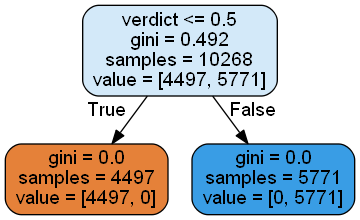

In [97]:
#Decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
dtree=DecisionTreeClassifier()
features = list(dfs_train_sensa.columns[15:21])
from sklearn.metrics import accuracy_score
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('Accuracy score is:')
print(accuracy_score(y_test,y_pred))

#we need pass features columns and dtree to graphviz 
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) 

### Naive Bayes

While the decision tree gives an accuracy of 43%, We try the NB to check for accuracy

In [98]:
#Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.43      1.00      0.60       556
          1       0.00      0.00      0.00       727

avg / total       0.19      0.43      0.26      1283

Confusion matrix:
 [[555   1]
 [727   0]]
Mean squared error: 0.57
Mean absolute error: 0.57
Root Mean Squared Error: 0.75 
Accuracy : 0.4325798908807482


### Random Forest:

Random forests are those that are a cumulation of a number of decision trees. Below is the implementation of a random forst for the dataset:

              precision    recall  f1-score   support

           0       0.46      0.41      0.43       556
           1       0.58      0.63      0.61       727

   micro avg       0.54      0.54      0.54      1283
   macro avg       0.52      0.52      0.52      1283
weighted avg       0.53      0.54      0.53      1283

Confusion matrix:
 [[228 328]
 [268 459]]
Mean squared error: 0.46
Mean absolute error: 0.46
Root Mean Squared Error: 0.68 
Accuracy  0.5354637568199533
Variable: lenCount             Importance: 0.74
Variable: capCount             Importance: 0.12
Variable: digCount             Importance: 0.1
Variable: sensPhrCount         Importance: 0.02
Variable: puncCount            Importance: 0.01
Variable: profanCount          Importance: 0.0


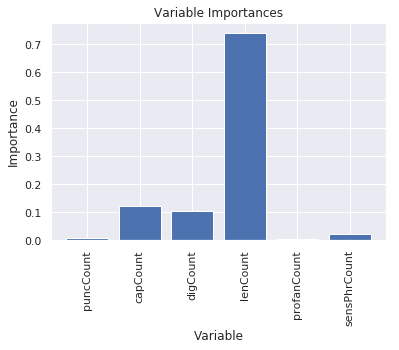

In [88]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))
cnfmtx=confusion_matrix(y_test,rfc_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, rfc_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("Accuracy ",accuracy_score(y_test,rfc_pred))

#plot 1 tree
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())


#get important features
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#plot important features
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Simple Vector Machine

After analysing the outputs of decions tree and random forest, we now try SVM on to the dataset

In [99]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))

             precision    recall  f1-score   support

          0       0.63      0.02      0.04       556
          1       0.57      0.99      0.72       727

avg / total       0.60      0.57      0.43      1283

Confusion matrix:
 [[ 12 544]
 [  7 720]]
Mean squared error: 0.43
Mean absolute error: 0.43
Root Mean Squared Error: 0.66 


## Doc2Vec for Credibility of the News Source
REf: https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [101]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [102]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hema
[nltk_data]     Raghavan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [104]:

df_Source = pd.read_csv("sample_test_data.csv")
df_Source

,headline,article,source,issensational
0,VIDEO: Host Breaks Down As He Learns What Musl...,"June 27, 2017Emily AnnReligion, World News\nA ...",Madworld,1
1,Chinese city leadership shake-up signals Xi po...,Beijing – A sudden leadership change in one of...,Brief.News,0
2,Miami judge rules Florida’s new ‘Stand Your Gr...,Brandon Morse 2 hours\nA Miami-Dade judge rule...,TheBlaze,1
3,"Trump, reversing course, wants Senate Republic...",Michael Reynolds / Getty Images\nPresident Tru...,LA Times – Politics,0
4,Pro-life group alleges Twitter is suppressing ...,"Kate Scanlon Jun 27, 2017 5:36 pm\nTwitter has...",TheBlaze,1
5,"BREAKING: Jeff Sessions Breaks Silence, Indict...","Under Attorney General Jeff Sessions, the Depa...",The Truth Division,1
6,Fire department IDs unit where Honolulu high-r...,A man takes pictures off of a balcony of the d...,Miami Herald – Politics,0
7,Fourth of July fireworks cause 68 horses to cr...,July 4 (UPI) -- Dozens of horses in Kentucky w...,United Press International – US,0
8,Remind Me Never To Piss Off Sarah Sanders!,"June 23, 2017Natalie D.0 Views 0 Comments# Pre...",USA Supreme,1
9,TODAY: 3 MOST FAMOUS Black Lives Matter Activi...,"June 28, 2017 by Thomas Rhett\nA couple of lib...",Proud Leader,1


In [106]:
data = df_Source['source'].values.tolist()
print(type(data))
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(df_Source.loc[i,'issensational'])]) for i, _d in enumerate(data)]
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data

<class 'list'>


[TaggedDocument(words=['madworld'], tags=['1']),
 TaggedDocument(words=['brief.news'], tags=['0']),
 TaggedDocument(words=['theblaze'], tags=['1']),
 TaggedDocument(words=['la', 'times', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['theblaze'], tags=['1']),
 TaggedDocument(words=['the', 'truth', 'division'], tags=['1']),
 TaggedDocument(words=['miami', 'herald', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['united', 'press', 'international', '–', 'us'], tags=['0']),
 TaggedDocument(words=['usa', 'supreme'], tags=['1']),
 TaggedDocument(words=['proud', 'leader'], tags=['1']),
 TaggedDocument(words=['lady', 'liberty', 'news'], tags=['1']),
 TaggedDocument(words=['the', 'diplomat'], tags=['0']),
 TaggedDocument(words=['foreign', 'policy'], tags=['0']),
 TaggedDocument(words=['empire', 'herald'], tags=['1']),
 TaggedDocument(words=['msnbc'], tags=['0']),
 TaggedDocument(words=['the', 'conversation', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['new', 'york', 'tim

## Iterations for the Model

With the new datasource, we perform about 60 iterations to perfect the model.

In [107]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\Users\Hema\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\Hema\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

# Validation

Once the iterations are complete, we now test the model by feeding a new statement into the model testing its accuracy

In [108]:
#testing for a document
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
#test_data = word_tokenize('A aqi men served her what she thought was meat and rice, but it was something else entirely — something far worse.ISIS held a Yazidi Christian mother captive in a cell for three days with no food or water before she was tricked into eating something absolutely cringe-worthy by an evil guard. When she finished her meal, the guard said, “We cooked your one-year-old son that we took from you, and this is what you just ate.”The faces behind this gruesome act of terror are devil-worshiping men who believe they are worshiping god and carry out unspeakably cruel acts against minorities in the Middle East daily. These men are taking women and children as sex slaves and massacring thousands every day. Anyone who can do something so unimaginable and follow a religion that allows it is one sick individual.The interviewer wiped away his tears, like anyone being told this horrific story would do, as his guest, identified only as Dakhill, continued with heart-wrenching stories of the captured woman in the Middle East.'.lower())
test_data = word_tokenize('The new york times magazine')
v1 = model.infer_vector(test_data)
#print("V1_infer", v1)

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('1')
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc[0][0])

1


### Inference

When the source is mentioned as "The new york times magazine", the model detects it as a truthful data source.

After this validation, we now go on to add this as a data enrichment into the dataset by adding a new coukumn to it

In [111]:
sourceCol=[]
for row in dfs_train_sensa['context']:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        sensationCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, sensationCol))
sourceCol

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


The new column is now called "context_new"

In [114]:
dfs_train_sensa['context_new']=pd.Series(sensationCol)
dfs_train_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,Weight,state info,party affiliation,barely true counts,...,pants on fire counts,context,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount,context_new
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,NaN,Texas,republican,0.0,...,0.0,1.0,0,0.0,0.0,0.0,8.0,0.0,0.0,1.0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,NaN,Virginia,democrat,0.0,...,0.0,1.0,1,0.0,0.0,0.0,14.0,0.0,0.0,1.0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,NaN,Illinois,democrat,70.0,...,9.0,1.0,1,0.0,1.0,0.0,6.0,0.0,0.0,1.0
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,NaN,none,7.0,...,44.0,1.0,0,0.0,0.0,0.0,14.0,0.0,0.0,1.0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,NaN,Florida,democrat,15.0,...,2.0,0.0,1,0.0,3.0,0.0,19.0,0.0,0.0,0.0
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,NaN,Wisconsin,republican,0.0,...,1.0,1.0,1,0.0,0.0,0.0,25.0,0.0,0.0,1.0
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,NaN,Texas,republican,3.0,...,1.0,0.0,0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,NaN,Illinois,democrat,70.0,...,9.0,1.0,1,0.0,3.0,0.0,39.0,0.0,0.0,1.0
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,NaN,organization,0.0,...,1.0,1.0,1,0.0,0.0,0.0,10.0,0.0,0.0,1.0
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,NaN,Wisconsin,republican,0.0,...,0.0,1.0,1,0.0,0.0,0.0,15.0,0.0,0.0,1.0


## Recursive operation on the test dataset

In [117]:
# same for testing data
testsourceCol=[]
for row in dfs_test_sensa['context']:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        testsourceCol.append(similar_doc[0][0])
    except:
        pass
testsourceCol=list(map(int, testsourceCol))
dfs_test_sensa['context_new']=pd.Series(testsourceCol)
dfs_test_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,...,pants on fire counts,context,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount,context_new
0,11972.json,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,...,18.0,Radio interview,1,0.0,1.0,0.0,15.0,0.0,0.0,1.0
1,11685.json,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,...,0.0,a news conference,0,0.0,0.0,0.0,17.0,0.0,0.0,0.0
2,11096.json,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,...,61.0,comments on ABC's This Week.,0,0.0,5.0,0.0,28.0,0.0,0.0,1.0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,...,1.0,a radio show,1,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,...,7.0,a web video,0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
5,5962.json,True,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1.0,2.0,...,0.0,a campaign website,1,0.0,0.0,0.0,18.0,0.0,0.0,0.0
6,7070.json,True,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0.0,0.0,...,0.0,in a post on Facebook.,1,0.0,1.0,0.0,22.0,0.0,0.0,1.0
7,1046.json,barely-true,"Says Vice President Joe Biden ""admits that the...","economy,stimulus",john-boehner,Speaker of the House of Representatives,Ohio,republican,13.0,22.0,...,2.0,a press release.,0,0.0,0.0,0.0,16.0,0.0,0.0,1.0
8,12849.json,True,Donald Trump is against marriage equality. He ...,"gays-and-lesbians,marriage",sean-patrick-maloney,Congressman for NY-18,New York,democrat,0.0,0.0,...,0.0,a speech at the Democratic National Convention,1,0.0,3.0,0.0,46.0,0.0,0.0,0.0
9,13270.json,barely-true,We know that more than half of Hillary Clinton...,foreign-policy,mike-pence,Governor,Indiana,republican,8.0,10.0,...,0.0,"comments on ""Meet the Press""",0,0.0,2.0,0.0,28.0,0.0,0.0,0.0


In [118]:
x_train1=dfs_train_sensa[dfs_train_sensa.columns[15:22]]
x_train=np.nan_to_num(x_train1)

y_train=dfs_train_sensa['verdict']

x_test1 = dfs_test_sensa[dfs_test_sensa.columns[15:22]]
x_test = np.nan_to_num(x_test1)
y_test = dfs_test_sensa['verdict']

In [119]:
x_train

array([[ 0.,  0.,  0., ...,  8.,  0.,  0.],
       [ 1.,  0.,  0., ..., 14.,  0.,  0.],
       [ 1.,  0.,  1., ...,  6.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Test dataset validation

Once the same process is applied to the test dataset, We validate it using the confusion matrix

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.43      1.00      0.60       556
          1       0.00      0.00      0.00       727

avg / total       0.19      0.43      0.26      1283

Confusion matrix:
 [[555   1]
 [727   0]]
Mean squared error: 0.57
Mean absolute error: 0.57
Root Mean Squared Error: 0.75 
Accuracy : 0.4325798908807482


# Observation and Inference:

The model comes up with a 43% accuracy against the second dataset along with doc2vec to get credibility classification. Meanign the initial dataset which had about 67% accuracy has not been very reliable and hence the accuracy reduced while inducing a new datasource.

We understand that sensationalism alone is not enough to determine if a news is fake or not but it does play a role. We wanted to assign a 40% importance to the credibility among the 4 factors that we are using  to classify data as true or not.

   # credibility factor = 0.4*(prediction from NB)

#### Also, Credibility may not be just linearly related to the overall equation. We can conclude that it may depend on the results of other factors like sensationalism. It can be assumed that if sensationalism is high then credibity factor will compound the effect that the news is explosively true. But if credibility is low then high sensationalism will most likely be fake news.